Scales

Nominal Scale of Measurement

Data are measured at the nominal level when each case is classified into one of a number of discrete categories. This is also called categorical, that is, used only for classification. As mean is not meaningful, all that we can do is to count the number of occurrences
of each type and compute the proportion (number of occurrences of each type / total occurrences).

Ordinal Scale of Measurement

Data are measured on an ordinal scale if the categories imply order. The difference between ranks is consistent in direction and authority, but not magnitude.

Interval Scale of Measurement

If the differences between values have meanings, the data are measured at the interval
scale. 

Ratio Scale of Measurement

Data measured on a ratio scale have differences that are meaningful, and relate to some
true zero point. This is the most common scale of measurement.


Handling Categorical Data

Most of the machine’s learning libraries are designed to work well with numerical variables. So categorical variables in their original form of text description can’t be directly used for model building. Let’s learn some of the common methods of handling categorical data based on their number of levels.

Creating dummy variables

In [1]:
import pandas as pd
from patsy import dmatrices
df = pd.DataFrame({'A': ['high', 'medium', 'low'],
                   'B': [10,20,30]},
                  index=[0, 1, 2])
print (df)

        A   B
0    high  10
1  medium  20
2     low  30


In [2]:
# using get_dummies function of pandas package
df_with_dummies= pd.get_dummies(df, prefix='A', columns=['A'])
print (df_with_dummies)

    B  A_high  A_low  A_medium
0  10       1      0         0
1  20       0      0         1
2  30       0      1         0


Convert to number: 
Another simple method is to represent the text description
of each level with a number by using the ‘Label Encoder’ function of Scikit-learn. If the number of levels are high (example zip code, state, etc.), then you apply the business logic to combine levels to groups. For example zip code or state can be combined to regions; however, in this method there is a risk of losing critical information. Another method is
to combine categories based on similar frequency (new category can be high, medium, low).

In [3]:
import pandas as pd
# using pandas package's factorize function
df['A_pd_factorized'] = pd.factorize(df['A'])[0]
# Alternatively you can use sklearn package's LabelEncoder function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df.A)
print(df)

        A   B  A_pd_factorized  A_LabelEncoded
0    high  10                0               0
1  medium  20                1               2
2     low  30                2               1


Normalizing Data

A unit or scale of measurement for different variables varies, so an analysis with the raw measurement could be artificially skewed toward the variables with higher absolute values. Bringing all the different types of variable units in the same order of magnitude thus eliminates the potential outlier measurements that would misrepresent the finding and negatively affect the accuracy of the conclusion. Two broadly used methods for rescaling data are normalization and standardization.
Normalizing data can be achieved by Min-Max scaling; the formula is given below, which will scale all numeric values in the range 0 to 1.

Normalization and scaling

In [4]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)
minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)
print('Mean before standardization: petal length={:.1f}, petal width={:.1f}'
      .format(X[:,0].mean(), X[:,1].mean()))
print('SD before standardization: petal length={:.1f}, petal width={:.1f}'
      .format(X[:,0].std(), X[:,1].std()))
print('Mean after standardization: petal length={:.1f}, petal width={:.1f}'
      .format(X_std[:,0].mean(), X_std[:,1].mean()))
print('SD after standardization: petal length={:.1f}, petal width={:.1f}'
      .format(X_std[:,0].std(), X_std[:,1].std()))
print('\nMin value before min-max scaling: patel length={:.1f}, patel width={:.1f}'
      .format(X[:,0].min(), X[:,1].min()))
print('Max value before min-max scaling: petal length={:.1f}, petal width={:.1f}'
      .format(X[:,0].max(), X[:,1].max()))
print('Min value after min-max scaling: patel length={:.1f}, patel width={:.1f}'
      .format(X_minmax[:,0].min(), X_minmax[:,1].min()))
print('Max value after min-max scaling: petal length={:.1f}, petal width={:.1f}'
      .format(X_minmax[:,0].max(), X_minmax[:,1].max()))

Mean before standardization: petal length=3.8, petal width=1.2
SD before standardization: petal length=1.8, petal width=0.8
Mean after standardization: petal length=-0.0, petal width=-0.0
SD after standardization: petal length=1.0, petal width=1.0

Min value before min-max scaling: patel length=1.0, patel width=0.1
Max value before min-max scaling: petal length=6.9, petal width=2.5
Min value after min-max scaling: patel length=0.0, patel width=0.0
Max value after min-max scaling: petal length=1.0, petal width=1.0


Feature Construction or Generation

Machine learning algorithms give best results only when we provide it the best possible features that structure the underlying form of the problem that you are trying to address. Often these features have to be manually created by spending a lot of time with actual raw data and trying to understand its relationship with all other data that you have collected to address a business problem.
It means thinking about aggregating, splitting, or combining features to create new features, or decomposing features. Often this part is talked about as an art form and is the key differentiator in competitive machine learning.
Feature construction is manual, slow, and requires subject-matter expert intervention heavily in order to create rich features that can be exposed to predictive modeling algorithms to produce best results.
Summarizing the data is a fundamental technique to help us understand the data quality and issues/gaps.

Exploratory Data Analysis (EDA)

EDA is all about understanding your data by employing summarizing and visualizing techniques. At a high level the EDA can be performed in two folds, that is, univariate analysis and multivariate analysis.
Let’s learn and consider an example dataset to learn practicality. Iris dataset is one of a well-known datasets used extensively in pattern recognition literature. It is hosted at UC Irvine Machine Learning Repository. The dataset contains petal length, petal width, sepal length, and sepal width measurement for three types of iris flowers, that is, setosa, versicolor, and virginica.
Univariate Analysis
Individual variables are analyzed in isolation to have a better understanding about them. Pandas provide the describe function to create summary statistics in tabular format for all variables. These statistics are very useful for numerical types of variables to understand any quality issues such as missing values and the presence of outliers.

In [5]:
#Univariate analysis
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])
# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.
species==1.0,'versicolor', 'virginica'))
# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print(iris['species'].value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In [7]:
#Pandas dataframe visualization
# Reading
df=pd.read_csv('Data/mtcars.csv')             # from csv
df=pd.read_csv('Data/mtcars.txt', sep='\t')   # from text file
df=pd.read_excel('Data/mtcars.xlsx','gegevens') # from Excel
# reading from multiple sheets of same Excel into different dataframes
xlsx = pd.ExcelFile('Data/mtcars.xlsx')
sheet1_df = pd.read_excel(xlsx, 'gegevens')
#sheet2_df = pd.read_excel(xlsx, 'Sheet1')
# writing
# index = False parameter will not write the index values, default is True
df.to_csv('Data/mtcars_new.csv', index=False)
df.to_csv('Data/mtcars_new.txt', sep='\t', index=False)
df.to_excel('Data/mtcars_new.xlsx',sheet_name='gegevens', index = False)

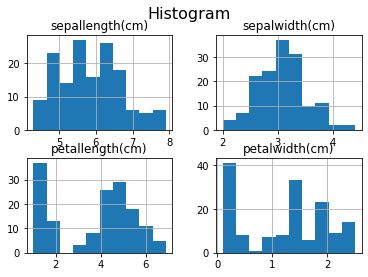

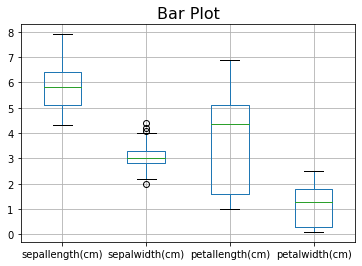

In [8]:
# Set the size of the plot
#plt.figsize(15, 8)
iris.hist()                            # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots
plt.show()
iris.boxplot()     # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()

Multivariate Analysis

In multivariate analysis you try to establish a sense of relationship of all variables with one other.
Let’s understand the mean of each feature by species type.

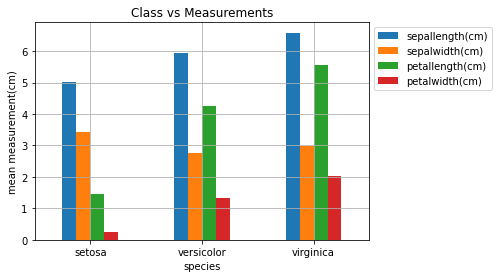

In [9]:
#Multivariate analysis
# print the mean for each column by species
iris.groupby(by = "species").mean()
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

Correlation Matrix

The correlation function uses Pearson correlation coefficient, which results in a number between -1 to 1. A strong negative relationship is indicated by a coefficient closer to -1 and a strong positive correlation is indicated by a coefficient toward 1.

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


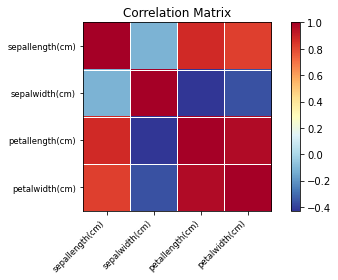

In [10]:
#Correlation matrix
# create correlation matrix
corr = iris.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Pair Plot

You can understand the relationship attributes by looking at the distribution of the interactions of each pair of attributes. This uses a built-in function to create a matrix of scatter plots of all attributes against all attributes.

Text(0.5, 0.98, 'Pair Plot')

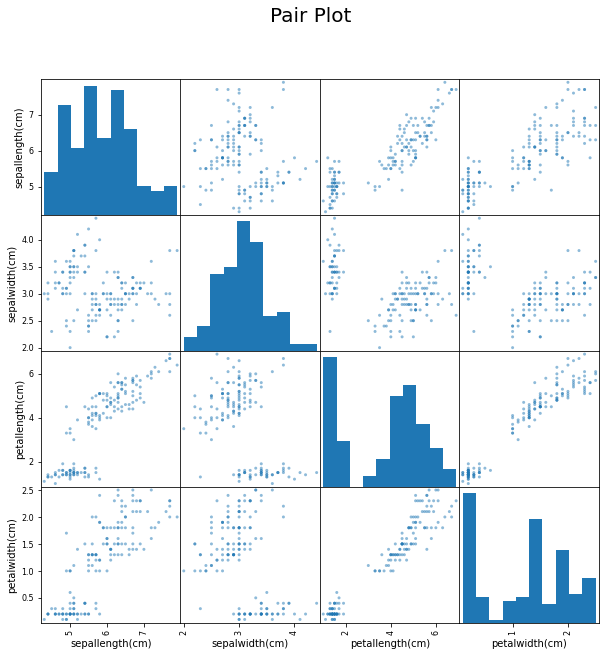

In [11]:
#Pair plot
from pandas.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 10))
# use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)

Supervised Learning– Regression

Can you guess what is common in the below set of business questions across different domains?
You might have guessed it right! The presence of the words ‘how much’ and ‘how many’ implies that the answer for these questions will be a quantitative or continuous number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different variables that are relevant to the questions that we are trying to answer.
Let’s consider a use case where we have collected students’ average test grade scores and their respective average number of study hours for the test for group of similar IQ students.

   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


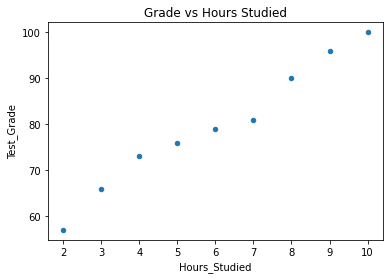

In [13]:
#Students score vs. hours studied
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Load data
df = pd.read_csv('Data/Grade_Set_1.csv')
print(df)
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
# check the correlation between variables
print(df.corr())

Fitting a Slope

Let’s try to fit a slope line through all the points such that the error or residual, that is, the
distance of line from each point is the best possible minimal.

The error could be positive or negative based on its location from the slope, because of which if we take a simple sum of all the errors, it will be zero. So we should square
the error to get rid of negativity and then sum the squared error. Hence, the slope is also referred to as least squares line.
• The slope equation is given by Y = mX + c, where Y is the predicted value for a given x value.
• m is the change in y, divided by change in x, that is, m is the slope of the line for the x variable and it indicates the steepness at which it increases with every unit increase in x variable value.
• c is the intercept that indicates the location or point on the axis where it intersects, in the case of Figure 3-5 it is 52. Intercept is a constant that represents the variability in Y that is not explained by the X. It is the value of Y when X is zero.

Intercept:  49.67777777777776
Coefficient:  [5.01666667]
Manual prdiction : 80.7485207083


/var/folders/z_/7_r8912n2zl33c2mqx4x_ng00000gn/T/ipykernel_92270/3320232332.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= df.Hours_Studied[:, np.newaxis] # independent variable


Text(0.5, 0, 'Hours_Studied')

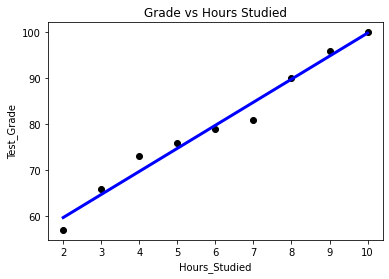

In [15]:
#Linear regression
# importing linear regression function
import sklearn.linear_model as lm
# Create linear regression object
lr = lm.LinearRegression()
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values            # dependent variable
# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)
# manual prediction for a given value of x
print("Manual prdiction :", 52.2928994083 + 4.74260355*6)
# predict using the built-in function
#print("Using predict function: ", lr.predict(6))
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

In [17]:
#Linear regression model accuracy matrices # function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
# add predict value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)
# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())
print ("Sum of SSR:", df['SSR'].sum())
print ("Sum of SST:", df['SST'].sum())
print ("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())
# Using built-in function
print ("R Squared using built-in function: ", r2_score(df.Test_Grade, y))
print ("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade,df.Test_Grade_Pred)))

Sum of SSR: 1510.0166666666673
Sum of SST: 1547.5555555555557
R Squared using manual calculation:  0.9757431074095351
R Squared using built-in function:  1.0
Mean Absolute Error:  1.618518518518523
Root Mean Squared Error:  2.0422995995497297


Polynomial Regression

It is a form of higher-order linear regression modeled between dependent and independent variables as an nth degree polynomial. Although it’s linear it can fit curves better. Essentially we’ll be introducing higher-order degree variables of the same independent variable in the equation.

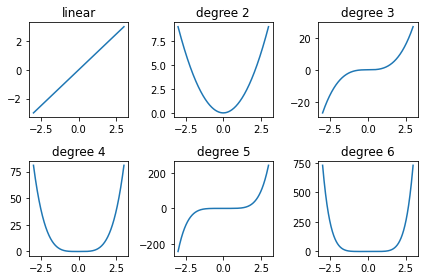

In [21]:
#Polynomial regression
x = np.linspace(-3,3,1000) # 1000 sample number between -3 to 3
# Plot subplots 
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')
plt.tight_layout()# tidy layout

    Hours_Studied  Test_Grade
0             0.5          20
1             1.0          21
2             2.0          22
3             3.0          23
4             4.0          25
5             5.0          37
6             6.0          48
7             7.0          56
8             8.0          67
9             9.0          76
10           10.0          90
11           11.0          89
12           12.0          90
Correlation Matrix: 
R Squared:  0.9503677766997879


/var/folders/z_/7_r8912n2zl33c2mqx4x_ng00000gn/T/ipykernel_92270/3699176473.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= df.Hours_Studied[:, np.newaxis]


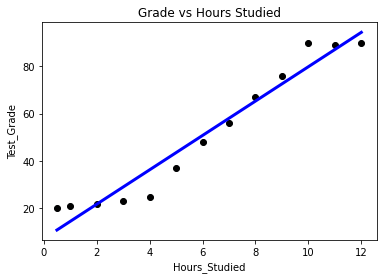

In [25]:
# Polynomial regression example
# Load data
df = pd.read_csv('Data/Grade_Set_2.csv')
print(df)
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
# check the correlation between variables
print("Correlation Matrix: ")
df.corr()
# Create linear regression object
lr = lm.LinearRegression()
x= df.Hours_Studied[:, np.newaxis]
y= df.Test_Grade
# Train the model using the training sets
lr.fit(x, y)
# independent variable
# dependent variable

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
print("R Squared: ", r2_score(y, lr.predict(x)))

0.9503677766997879
0.9608726568678714
0.9938323120374665
0.9955000184096712
0.9956204913897357


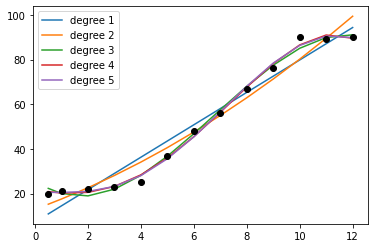

In [28]:
#r-squared for different polynomial degrees lr = lm.LinearRegression()
x= df.Hours_Studied        # independent variable
y= df.Test_Grade           # dependent variable NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2)
    print(r2_score(y, y_lr))
plt.plot(x, y, 'ok')

/var/folders/z_/7_r8912n2zl33c2mqx4x_ng00000gn/T/ipykernel_92270/3979507328.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x= df.Hours_Studied[:, np.newaxis]


R Squared using built-in function:  0.9955000184096712


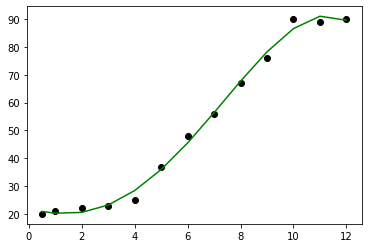

In [46]:
#scikit-learn polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

#x= df.Hours_Studied[:, np.array([:, np.nan])] # independent variable
#x= df.Hours_Studied[:, np.array()]
x= df.Hours_Studied[:, np.newaxis]
y= df.Test_Grade                   # dependent variable
degree = 4
model = make_pipeline(PolynomialFeatures(degree), lr)
model.fit(x, y)
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='green')
print("R Squared using built-in function: ", r2_score(y, model.predict(x)))

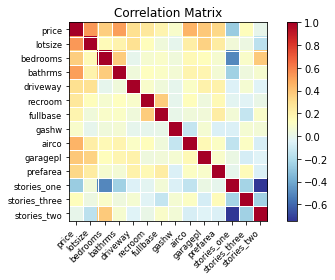

In [48]:
#Multicollinearity and VIF # Load data
df = pd.read_csv('Data/Housing_Modified.csv')
# Convert binary fields to numeric boolean fields
lb = preprocessing.LabelBinarizer()
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)
# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first=True)# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis=1)
del df['stories']
# lets plot correlation matrix using statmodels graphics packages's plot_corr
# create correlation matrix
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()